In [4]:
# Importing Packages
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile, assemble, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit_textbook.tools import simon_oracle

In [10]:
bb =  input("Enter the input string:\n")

Enter the input string:
011


C:\Users\barbi\AppData\Local\Temp\ipykernel_19520\2915560389.py:21: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  simon_circuit += simon_oracle(bb)


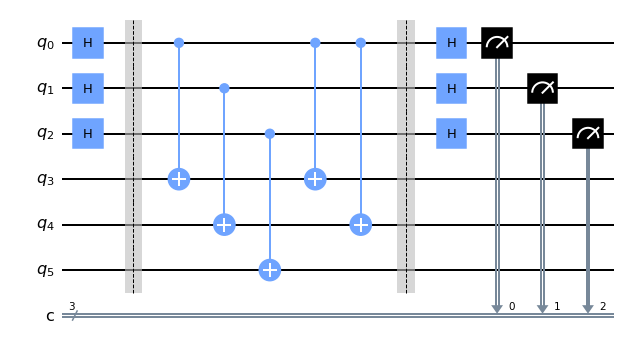

In [11]:
### Using in-built "simon_oracle" from QISKIT

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile, assemble

# import basic plot tools
from qiskit.visualization import plot_histogram
from qiskit_textbook.tools import simon_oracle

n = len(bb)
simon_circuit = QuantumCircuit(n*2, n)

# Apply Hadamard gates before querying the oracle
simon_circuit.h(range(n))    
    
# Apply barrier for visual separation
simon_circuit.barrier()

simon_circuit += simon_oracle(bb)

# Apply barrier for visual separation
simon_circuit.barrier()

# Apply Hadamard gates to the input register
simon_circuit.h(range(n))

# Measure qubits
simon_circuit.measure(range(n), range(n))
simon_circuit.draw(output="mpl")

{'011': 118, '111': 132, '000': 122, '100': 128}


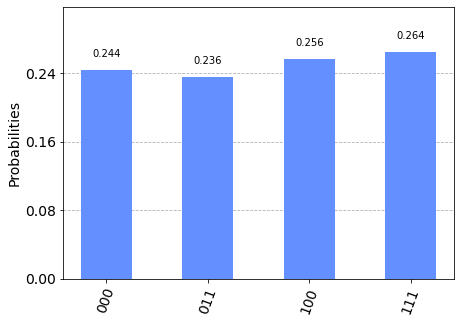

In [12]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
shots = 500
qobj = assemble(simon_circuit, shots=shots)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
print(counts)
plot_histogram(counts)

In [40]:
# Calculate the dot product of the results
def bdotz(b, z):
    accum = 0
    for i in range(len(b)):
        accum += int(b[i]) * int(z[i])
    return (accum % 2)

for z in counts:
    print( '{}.{} = {} (mod 2)'.format(b, z, bdotz(b,z)) )

100.001 = 0 (mod 2)
100.000 = 0 (mod 2)
100.010 = 0 (mod 2)
100.011 = 0 (mod 2)


In [13]:
b = input("Enter a binary string:\n")

Enter a binary string:
011


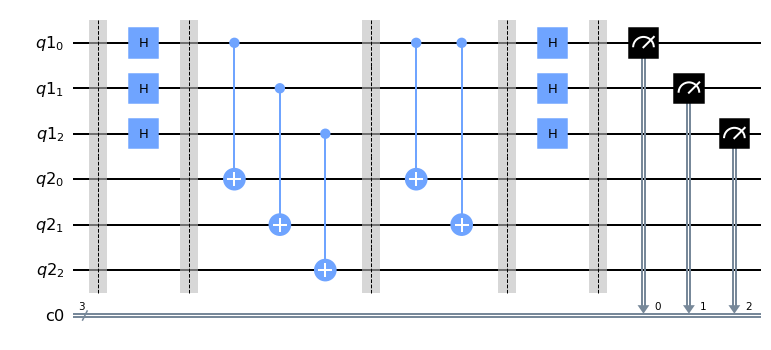

In [14]:
# Actual b = 011
b_rev = b[::-1]
flagbit = b_rev.find('1')
n=len(b)

q1=QuantumRegister(n,'q1')
q2=QuantumRegister(n,'q2')
c1=ClassicalRegister(n)
qc = QuantumCircuit(q1,q2,c1)
qc.barrier()

qc.h(q1)
qc.barrier()

for i in range(n):
    qc.cx(q1[i],q2[i])
qc.barrier()

if flagbit != -1:
#     print("test1")
    for ind, bit in enumerate(b_rev):
#         print("test2")
        if bit == "1":
#             print("test3")
            qc.cx(flagbit, q2[ind])
            
qc.barrier()

qc.h(q1)
qc.barrier()

qc.measure(q1,c1)

qc.draw("mpl")
    

{'011': 117, '100': 127, '000': 131, '111': 125}


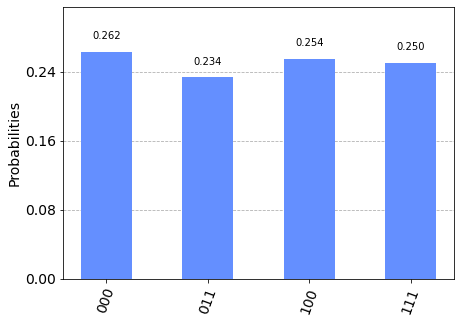

In [15]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 500
qobj = assemble(qc, shots=shots)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
print(counts)
plot_histogram(counts)

In [25]:
# Actual b = 011
b="1"
b_rev = "1"
flagbit = b_rev.find('1')
n=len(b)

q1=QuantumRegister(n,'q1')
q2=QuantumRegister(n,'q2')
c1=ClassicalRegister(n)
qc = QuantumCircuit(q1,q2,c1)
qc.barrier()

qc.h(q1)
qc.barrier()

for i in range(n):
    qc.cx(q1[i],q2[i])
qc.barrier()

if flagbit != -1:
#     print("test1")
    for ind, bit in enumerate(b_rev):
#         print("test2")
        if bit == "1":
#             print("test3")
            qc.cx(flagbit, q2[ind])
qc.barrier()

qc.h(q1)
qc.barrier()

# qc.measure(q1,c1)

# qc.draw("mpl")

# Simulate the unitary
usim = Aer.get_backend('aer_simulator')
qc.save_unitary()
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
# Display the results:
array_to_latex(unitary, prefix="\\text{Circuit = } ")

<IPython.core.display.Latex object>

# References
[Exploring Simon’s Algorithm with Daniel Simon](https://github.com/aws/amazon-braket-examples/blob/main/examples/advanced_circuits_algorithms/Simons_Algorithm/Simons_Algorithm.ipynb)

[Medium Article by Mr. Asif](https://medium.com/codex/implementing-simons-algorithm-in-qiskit-9155ce6a9527)

[Notebook.community](https://notebook.community/antoniomezzacapo/qiskit-tutorial/community/algorithms/simon_algorithm)

[Qiskit Simon Source Code](https://qiskit.org/documentation/stable/0.19/_modules/qiskit/aqua/algorithms/education/simon.html#Simon)

[QuantuC](https://www.youtube.com/watch?v=7hYQzIHhDXA)

[QC Stackexchange-1](https://quantumcomputing.stackexchange.com/questions/6586/coding-an-oracle-for-simons-algorithm?rq=1)

[QC Stackexchange-2](https://quantumcomputing.stackexchange.com/questions/15567/in-simons-algorithm-is-there-a-general-method-to-define-an-oracle-given-a-cert)